In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, balanced_accuracy_score, roc_curve
)
from scipy.stats import pearsonr
import scipy.linalg
import scipy.optimize as opt

In [2]:
data = pd.read_csv("data.csv", sep=";")
# Fix messy column names
data.columns = data.columns.str.strip().str.replace('\t', '', regex=False)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [4]:
#Drop not needed columns
data = data.drop(columns=["Nacionality", "Application mode","Previous qualification (grade)",
       'Mother\'s occupation', 'Father\'s occupation','Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', "Tuition fees up to date",'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)

In [5]:

data = data[data["Target"]!= "Enrolled"]
data["Target"] = data["Target"].map({"Graduate":1, "Dropout":0})

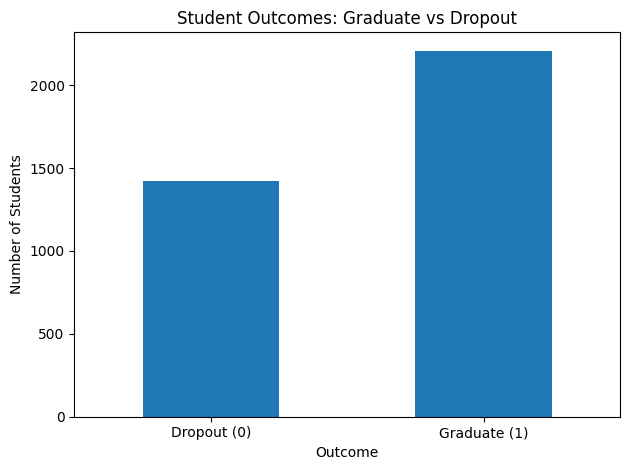

In [6]:
data.Target.value_counts()
# Count target values
target_counts = data["Target"].value_counts().sort_index()
labels = ["Dropout (0)", "Graduate (1)"]
target_counts.index = labels

# Plot
target_counts.plot(kind='bar')
plt.title("Student Outcomes: Graduate vs Dropout")
plt.xlabel("Outcome")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
data.Target.value_counts()

1    2209
0    1421
Name: Target, dtype: int64

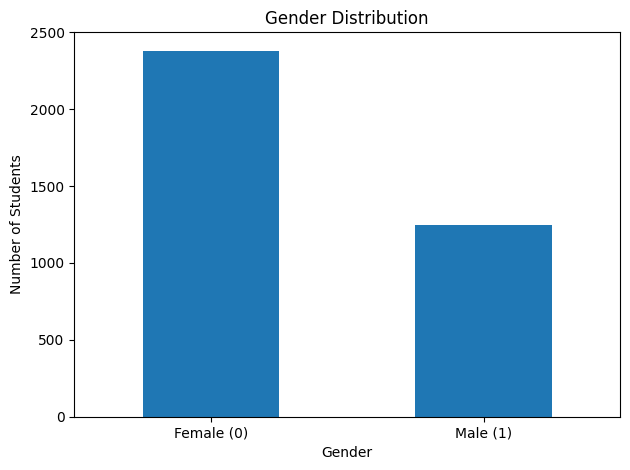

In [8]:
# 0 (female) and 1 (male), just convert to int
data["Gender"] = data["Gender"].astype(int)

# Count gender values
gender_counts = data["Gender"].value_counts().sort_index()
labels = ["Female (0)", "Male (1)"]
gender_counts.index = labels

# Plot
gender_counts.plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
data.Gender.value_counts()

0    2381
1    1249
Name: Gender, dtype: int64

In [10]:
data

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Admission grade,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Target
0,1,5,171,1,1,19,12,127.3,1,0,0,1,0,20,0,0
1,1,1,9254,1,1,1,3,142.5,1,0,0,1,0,19,0,1
2,1,5,9070,1,1,37,37,124.8,1,0,0,1,0,19,0,0
3,1,2,9773,1,1,38,37,119.6,1,0,0,0,0,20,0,1
4,2,1,8014,0,1,37,38,141.5,0,0,0,0,0,45,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,1,1,1,1,122.2,0,0,0,1,0,19,0,1
4420,1,2,9773,1,1,1,1,119.0,1,0,1,0,0,18,1,0
4421,1,1,9500,1,1,37,37,149.5,1,0,0,0,1,30,0,0
4422,1,1,9147,1,1,37,37,153.8,1,0,0,0,1,20,0,1


In [11]:
# Define higher and non-higher education indices
# Spliting various educational levels into 2: have a higher education or do not have
higher_education = {2, 3, 4, 5, 6, 40, 41, 42, 43, 44}

# Map to binary values
data['mother_education'] = data["Mother's qualification"].apply(
    lambda x: 1 if x in higher_education else 0)

# Map to binary values
data['father_education'] = data["Father's qualification"].apply(
    lambda x: 1 if x in higher_education else 0)

data = data.drop(columns=["Father's qualification","Mother's qualification" ], axis=1)

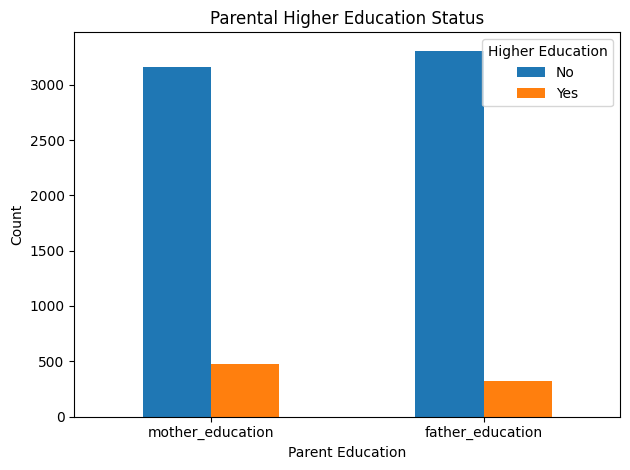

In [12]:
# Plotting the counts
education_counts = data[['mother_education', 'father_education']].apply(pd.Series.value_counts).T

# Create bar plot
education_counts.plot(kind='bar', stacked=False)
plt.title("Parental Higher Education Status")
plt.xlabel("Parent Education")
plt.ylabel("Count")
plt.legend(title="Higher Education", labels=["No", "Yes"], loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# various possible courses are mentioned. We merge same subject day and evening courses.
# Once hot encode all the courses
data.Course.value_counts()

merge_map = {8014:9238, 9991:9147}
data["Course"] = data["Course"].replace(merge_map)
course_map = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education"
}
data["course_name"] = data["Course"].map(course_map)


data.Course.value_counts()
data = data.drop("Course", axis=1)

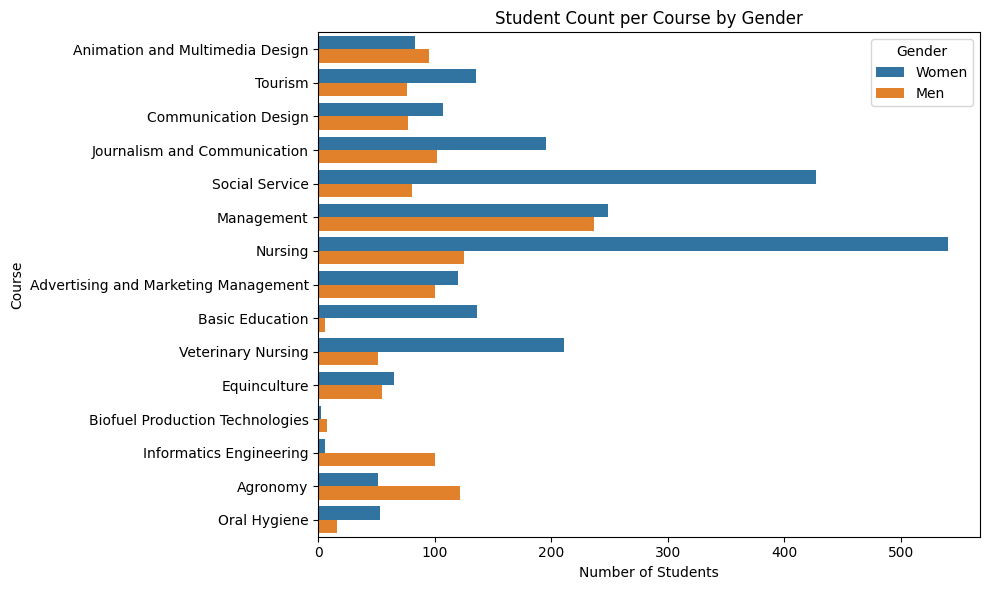

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y="course_name", hue="Gender")  # Horizontal bar plot with hue
plt.title("Student Count per Course by Gender")
plt.xlabel("Number of Students")
plt.ylabel("Course")
plt.legend(title="Gender")
ax.legend(title="Gender", labels=["Women", "Men"])
plt.tight_layout()
plt.show()


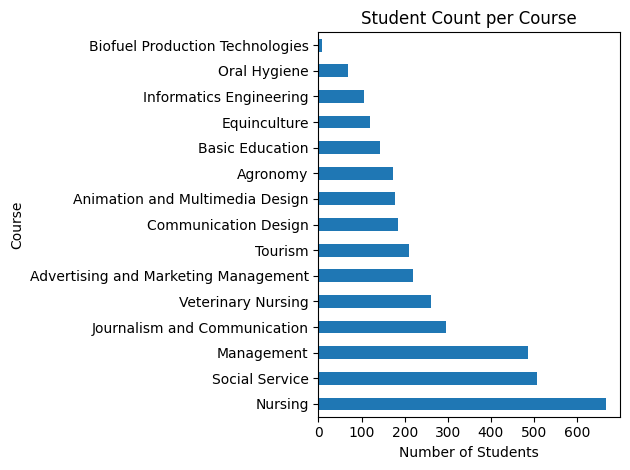

In [ ]:

# Create a bar plot for course distribution
data["course_name"].value_counts().plot(kind='barh')
plt.title("Student Count per Course")
plt.xlabel("Number of Students")
plt.ylabel("Course")

plt.tight_layout()
plt.show()

In [15]:
# Previous qualification we split into 3 groups: have a higher education, do not have higher education, do not have full secondary education
data["Previous qualification"].value_counts()

already_higher = {2,3,4,5,6,40, 42, 43}
no_higher = {1,39}
non_secondary = {9,10,12,14,15,19,38}

def tri_map(value):
    if value in already_higher:
        return 1
    elif value in no_higher:
        return 0
    elif value in non_secondary:
        return 2
    else:
        return None

data["Previous_qualification"] = data["Previous qualification"].apply(tri_map)
data.drop("Previous qualification", axis=1, inplace=True)

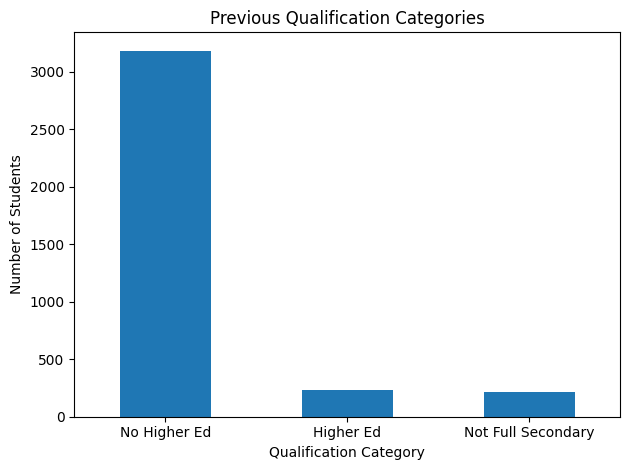

In [16]:
# Count and label the categories
qualification_counts = data["Previous_qualification"].value_counts().sort_index()
labels = ["No Higher Ed", "Higher Ed", "Not Full Secondary"]

# Plot
qualification_counts.index = labels
qualification_counts.plot(kind='bar')
plt.title("Previous Qualification Categories")
plt.xlabel("Qualification Category")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

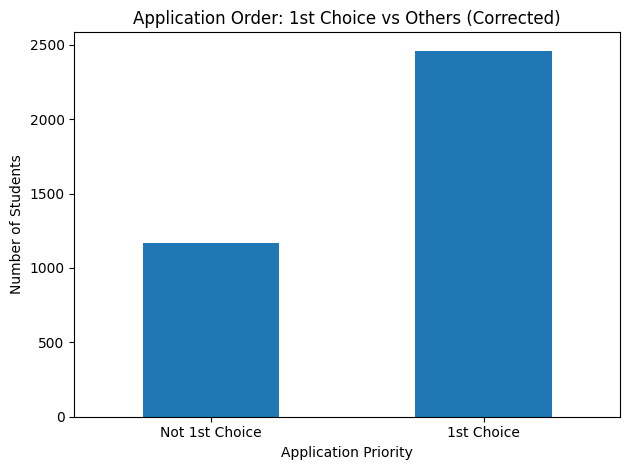

In [17]:
data["Application order"] = (data["Application order"] == 1).astype(int)
data["Application order"].value_counts()
# Count and label the application order values
application_order_counts = data["Application order"].value_counts().sort_index()
labels = ["Not 1st Choice", "1st Choice"]
application_order_counts.index = labels

# Plot
application_order_counts.plot(kind='bar')
plt.title("Application Order: 1st Choice vs Others (Corrected)")
plt.xlabel("Application Priority")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



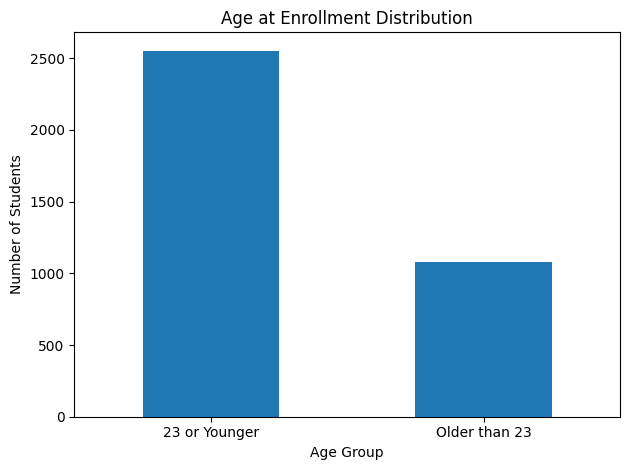

In [18]:
data["Age at enrollment"] = (data["Age at enrollment"] > 23).astype(int)
# Count and label the age groups
age_enrollment_counts = data["Age at enrollment"].value_counts().sort_index()
labels = ["23 or Younger","Older than 23"]
age_enrollment_counts.index = labels

# Plot
age_enrollment_counts.plot(kind='bar')
plt.title("Age at Enrollment Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
data["Age at enrollment"].value_counts()

0    2553
1    1077
Name: Age at enrollment, dtype: int64

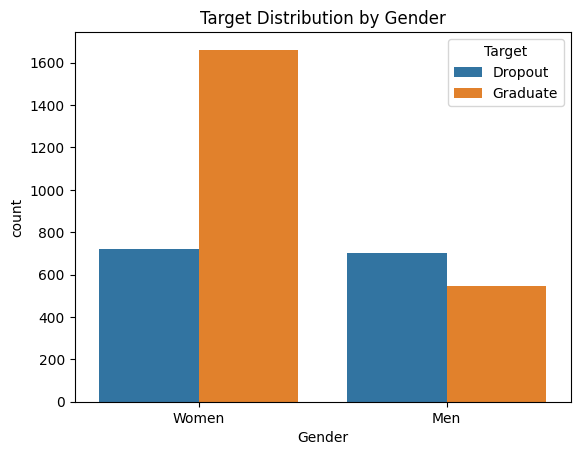

In [20]:
ax = sns.countplot(data=data, x="Gender", hue="Target")
plt.xticks([0,1], ["Women", "Men"])
plt.title("Target Distribution by Gender")
ax.legend(title="Target", labels=["Dropout", "Graduate"])
plt.show()


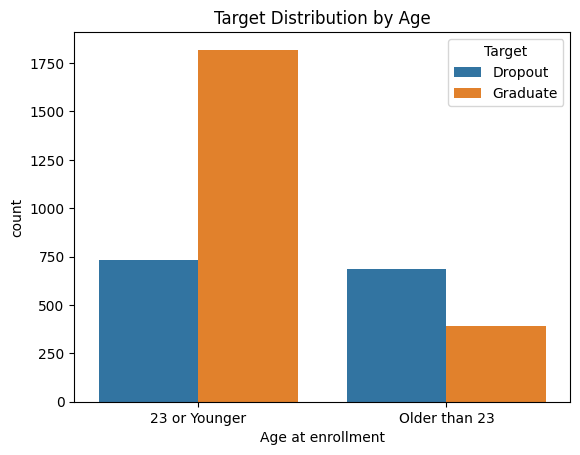

In [21]:
ax= sns.countplot(data=data, x="Age at enrollment", hue="Target")
plt.xticks([0, 1], ["23 or Younger", "Older than 23"])
plt.title("Target Distribution by Age")
ax.legend(title="Target", labels=["Dropout", "Graduate"])
plt.show()


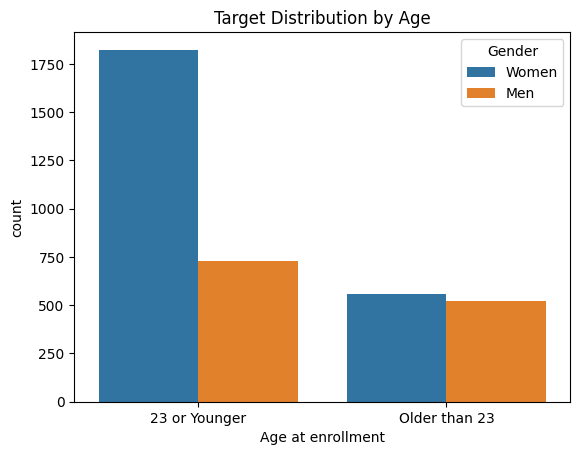

In [71]:
ax= sns.countplot(data=data, x="Age at enrollment", hue="Gender")
plt.xticks([0, 1], ["23 or Younger", "Older than 23"])
plt.title("Target Distribution by Age")
ax.legend(title="Gender", labels=["Women", "Men"])
plt.show()


In [23]:
cols = ["Marital status","course_name", "Previous_qualification"]

df_proc = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=cols, drop_first=True)

In [69]:
df_proc

,Application order,Daytime/evening attendance,Admission grade,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,...,course_name_Informatics Engineering,course_name_Journalism and Communication,course_name_Management,course_name_Nursing,course_name_Oral Hygiene,course_name_Social Service,course_name_Tourism,course_name_Veterinary Nursing,Previous_qualification_1,Previous_qualification_2
0,0,1,127.3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,142.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,124.8,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,119.6,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,141.5,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,1,122.2,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4420,0,1,119.0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4421,1,1,149.5,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4422,1,1,153.8,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


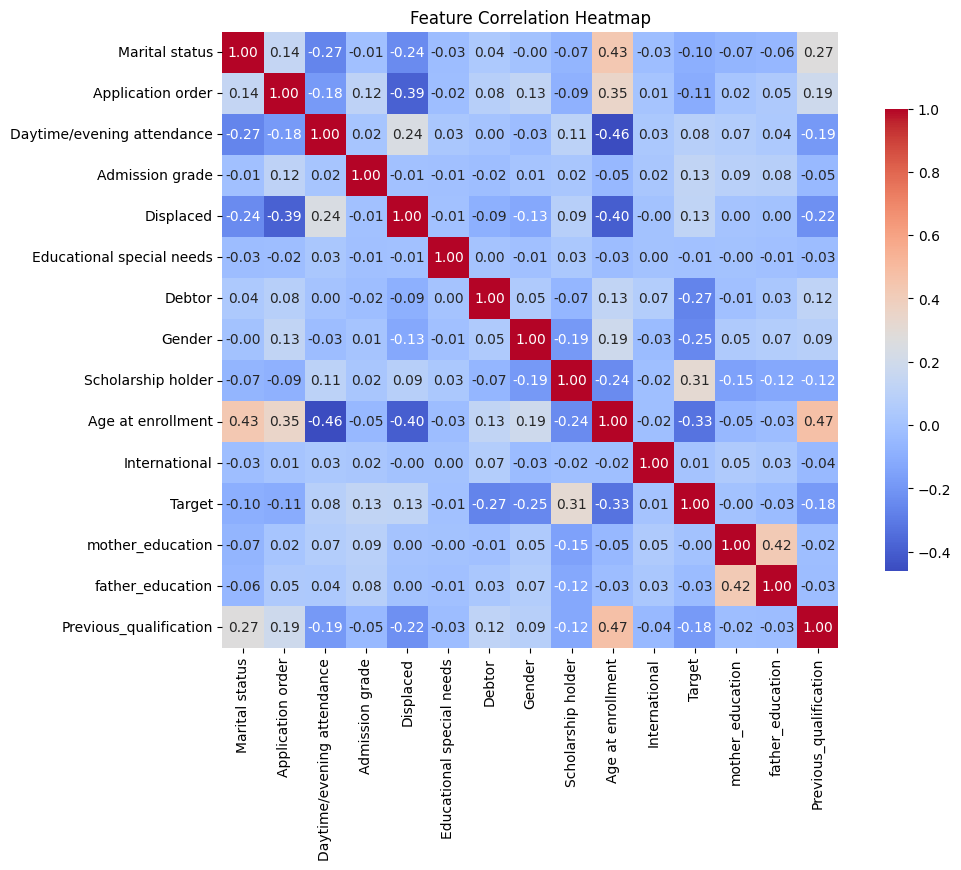

In [24]:
# Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75})

# Set title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

In [25]:
y = df_proc["Target"]
X = df_proc.drop("Target", axis=1)

In [26]:
cols_to_scale = ["Admission grade"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

overall_accuracies = []
overall_f1s = []

# Group metrics dictionary
group_metrics = {m: {g: [] for g in ["Female", "Male", "Over_23", "Under_23"]} for m in ["F1", "Accuracy","PositiveRate", "BalancedAccuracy"]}
'''
group_metrics = {
    "F1": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},
    "PositiveRate": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},
    "Accuracy": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},
    "BalancedAccuracy": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},
}
'''



'\ngroup_metrics = {\n    "F1": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},\n    "PositiveRate": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},\n    "Accuracy": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},\n    "BalancedAccuracy": {"Female": [], "Male": [], "Over_23": [], "Under_23": []},\n}\n'

In [27]:
# Cross-validation loop
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scale selected features
    scaler = StandardScaler().fit(X_train[cols_to_scale])
    X_train_scaled_part = scaler.transform(X_train[cols_to_scale])
    X_test_scaled_part = scaler.transform(X_test[cols_to_scale])

    X_train_other = X_train.drop(columns=cols_to_scale)
    X_test_other = X_test.drop(columns=cols_to_scale)

    X_train_scaled = pd.DataFrame(
        np.hstack([X_train_scaled_part, X_train_other.values]),
        columns=cols_to_scale + list(X_train_other.columns),
        index=X_train.index
    )
    X_test_scaled = pd.DataFrame(
        np.hstack([X_test_scaled_part, X_test_other.values]),
        columns=cols_to_scale + list(X_test_other.columns),
        index=X_test.index
    )

    # Train model
    model = LogisticRegression(
        max_iter=5000, penalty=None, C=0.8497534359086438, tol=1e-4, solver="saga"
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Store overall metrics
    overall_accuracies.append(accuracy_score(y_test, y_pred))
    overall_f1s.append(f1_score(y_test, y_pred))
    
    # Define group masks
    group_test_dict = {
        "Female": X_test_scaled["Gender"] == 0,
        "Male": X_test_scaled["Gender"] == 1,
        "Under_23": X_test_scaled["Age at enrollment"] == 0,
        "Over_23": X_test_scaled["Age at enrollment"] == 1
        
    }

    # Compute metrics per group
    for group, mask in group_test_dict.items():
        if mask.sum() == 0:
            continue
        group_metrics["F1"][group].append(f1_score(y_test[mask], y_pred[mask]))
        group_metrics["PositiveRate"][group].append(np.mean(y_pred[mask]))
        group_metrics["Accuracy"][group].append(accuracy_score(y_test[mask], y_pred[mask]))
        group_metrics["BalancedAccuracy"][group].append(balanced_accuracy_score(y_test[mask], y_pred[mask]))

/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


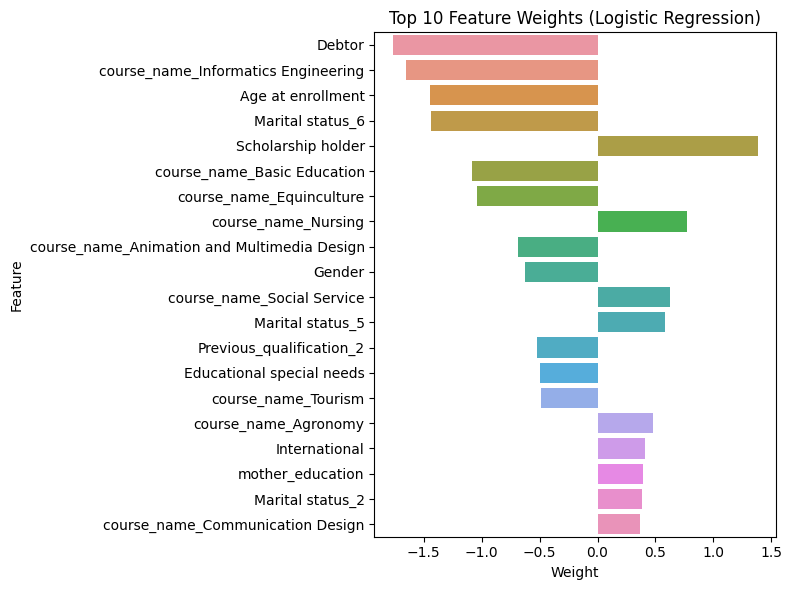

In [28]:
importance_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Weight": model.coef_[0]
}).sort_values(by="Weight", key=np.abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df.head(20), x="Weight", y="Feature")
plt.title("Top 10 Feature Weights (Logistic Regression)")
plt.tight_layout()
plt.show()

In [29]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [30]:
# Print overall metrics
print(f"Mean Accuracy: {np.mean(overall_accuracies):.4f}")
print(f"Mean F1 Score: {np.mean(overall_f1s):.4f}")

# Print group-level metrics
for metric, results in group_metrics.items():
    print(f"\n--- {metric} ---")
    for group, scores in results.items():
        if scores:
            print(f"{group}: {np.mean(scores):.2f}")

Mean Accuracy: 0.7584
Mean F1 Score: 0.8097

--- F1 ---
Female: 0.85
Male: 0.67
Over_23: 0.55
Under_23: 0.86

--- Accuracy ---
Female: 0.78
Male: 0.72
Over_23: 0.71
Under_23: 0.78

--- PositiveRate ---
Female: 0.79
Male: 0.41
Over_23: 0.28
Under_23: 0.82

--- BalancedAccuracy ---
Female: 0.69
Male: 0.71
Over_23: 0.67
Under_23: 0.67


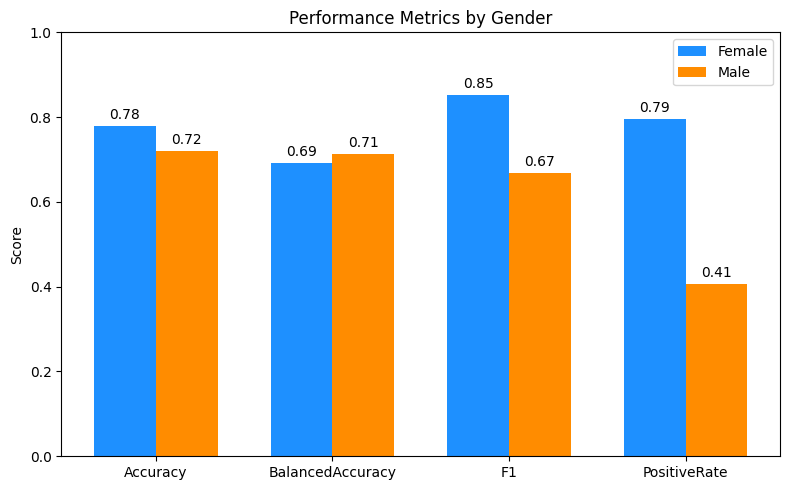

In [32]:
# Extract averages for Female and Male
metrics = ["Accuracy", "BalancedAccuracy", "F1", "PositiveRate"]
genders = ["Female", "Male"]

# Build data matrix: rows = metrics, cols = gender values
plot_data = []
for metric in metrics:
    row = [np.mean(group_metrics[metric][gender]) for gender in genders]
    plot_data.append(row)

# Convert to NumPy array for easy plotting
plot_data = np.array(plot_data)

# Plot
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, plot_data[:, 0], width, label='Female', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data[:, 1], width, label='Male', color='#FF8C00')

# Labels & formatting
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Gender')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=10)

plt.tight_layout()
plt.show()


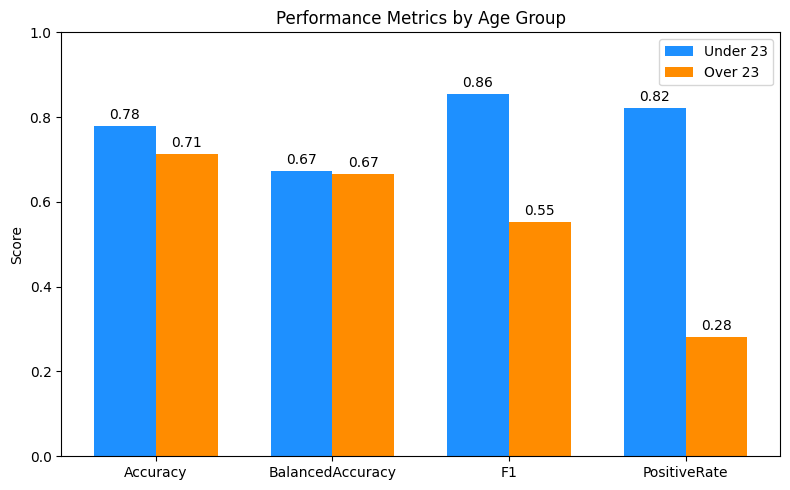

In [33]:
# Metrics and age groups
metrics = ["Accuracy", "BalancedAccuracy", "F1", "PositiveRate"]
age_groups = ["Under_23", "Over_23"]

# Build data matrix
plot_data_age = []
for metric in metrics:
    row = [np.mean(group_metrics[metric][age]) for age in age_groups]
    plot_data_age.append(row)

# Convert to NumPy array for plotting
plot_data_age = np.array(plot_data_age)

# Plot
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, plot_data_age[:, 0], width, label='Under 23', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data_age[:, 1], width, label="Over 23", color='#FF8C00')

# Labels & formatting
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# fairness metrics and fixing them

calculating fairness metrics


In [34]:
def stat_parity(pred, group_feature):
    group0 = np.mean(pred[group_feature == 0])
    group1 = np.mean(pred[group_feature == 1])
    return group0, group1

def equal_odds(pred, true, group_feature, target_label):
    mask_0 = (true == target_label) & (group_feature == 0)
    mask_1 = (true == target_label) & (group_feature == 1)
    group0 = np.mean(pred[mask_0]) if mask_0.sum() > 0 else np.nan
    group1 = np.mean(pred[mask_1]) if mask_1.sum() > 0 else np.nan
    return group0, group1

def compute_fairness_metrics(pred, true, group_feature, group_names=("Group 0", "Group 1")):
    scores = [
        stat_parity(pred, group_feature),
        equal_odds(pred, true, group_feature, target_label=0),  # FPR comparison
        equal_odds(pred, true, group_feature, target_label=1),  # TPR comparison
    ]
    metric_names = ["Statistical Parity", "FPR (Equalized Odds)", "TPR (Equalized Odds)"]

    rows = []
    for metric, (g0, g1) in zip(metric_names, scores):
        rows.append({"Metric": metric, "Group": group_names[0], "Score": g0})
        rows.append({"Metric": metric, "Group": group_names[1], "Score": g1})
    return pd.DataFrame(rows)



In [35]:
fair_age = compute_fairness_metrics(
    pred=y_pred,
    true=y_test,
    group_feature=X_test_scaled["Age at enrollment"],
    group_names=["Under 23", "Over 23"]
)
print(fair_age)

                 Metric     Group     Score
0    Statistical Parity  Under 23  0.812877
1    Statistical Parity   Over 23  0.235808
2  FPR (Equalized Odds)  Under 23  0.530201
3  FPR (Equalized Odds)   Over 23  0.111111
4  TPR (Equalized Odds)  Under 23  0.933908
5  TPR (Equalized Odds)   Over 23  0.414894


In [36]:
fair_gender = compute_fairness_metrics(
    pred=y_pred,
    true=y_test,
    group_feature=X_test_scaled["Gender"],
    group_names=["Female", "Male"]
)
print(fair_gender)


                 Metric   Group     Score
0    Statistical Parity  Female  0.761711
1    Statistical Parity    Male  0.357447
2  FPR (Equalized Odds)  Female  0.470588
3  FPR (Equalized Odds)    Male  0.167939
4  TPR (Equalized Odds)  Female  0.893491
5  TPR (Equalized Odds)    Male  0.596154


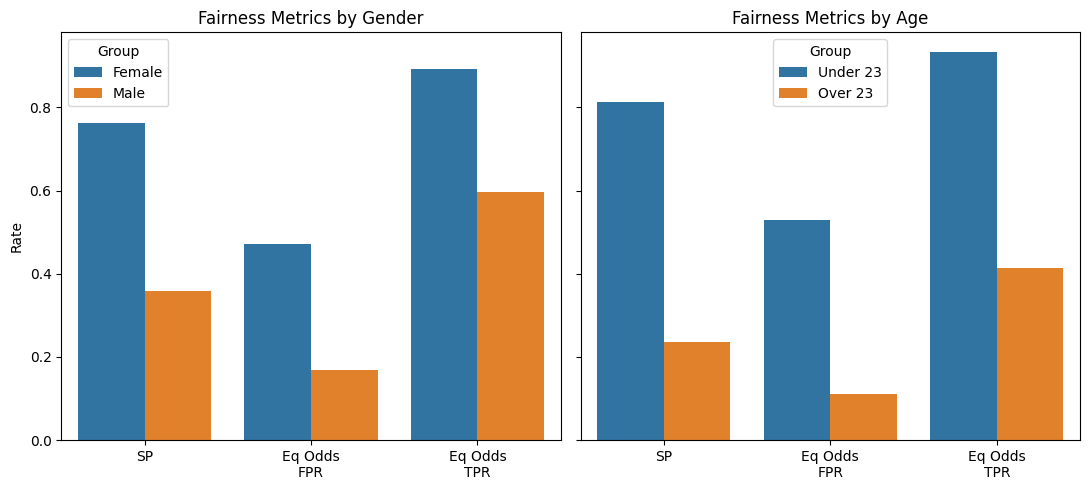

In [37]:
def plot_fairness(fair_gender, fair_age):
    fig, ax = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

    sns.barplot(data=fair_gender,
                x="Metric",
                y="Score",
                hue="Group",
                ax=ax[0])
    ax[0].set_title("Fairness Metrics by Gender")
    ax[0].set_ylabel("Rate")
    ax[0].set_xlabel("")
    ax[0].set_xticklabels(['SP', 'Eq Odds\nFPR', 'Eq Odds\nTPR'])

    sns.barplot(data=fair_age,
                x="Metric",
                y="Score",
                hue="Group",
                ax=ax[1])
    ax[1].set_title("Fairness Metrics by Age")
    ax[1].set_ylabel("")
    ax[1].set_xlabel("")
    ax[1].set_xticklabels(['SP', 'Eq Odds\nFPR', 'Eq Odds\nTPR'])

    plt.tight_layout()
    plt.show()
plot_fairness(fair_gender, fair_age)

## Post processing 

In [38]:
def roc_curve_generator(test, prob): 
    # Compute ROC curve 
    #false positive rate, true positive rate, threshold
    fpr, tpr, thr = roc_curve(test, prob, drop_intermediate=False)

    # Plot it
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def roc_curve_generator_groups(y_true1, prob1, y_true2, prob2, group1_name, group2_name): 
    fpr1, tpr1, thr1 = roc_curve(y_true1, prob1, drop_intermediate=False)
    fpr2, tpr2, thr2 = roc_curve(y_true2, prob2, drop_intermediate=False)

    tpr_diff = []
    fpr_diff = []
    thresholds = []

    for p in np.arange(0.1, 0.99, 0.001):
        try:
            idx1 = np.where(tpr1 > p)[0][0]
            idx2 = np.where(tpr2 > p)[0][0]
        except IndexError:
            continue  # Skip if TPR doesn't exceed p in either group

        tpr_diff.append(abs(tpr1[idx1] - tpr2[idx2]))
        fpr_diff.append(abs(fpr1[idx1] - fpr2[idx2]))
        thresholds.append((thr1[idx1], thr2[idx2]))

    if not thresholds:
        print("No threshold found with TPR > 0.1 for both groups.")
        return None, None

    diffs = []
    for i in range(len(fpr_diff)):
        diffs.append(abs(fpr_diff[i] - tpr_diff[i]))

    n = np.argmin(diffs)

    thr_group1, thr_group2 = thresholds[n]


    # Plot
    plt.figure(figsize=(7, 5))
    plt.plot(fpr1, tpr1, label=group1_name)
    plt.plot(fpr2, tpr2, label=group2_name)
    plt.title("ROC Curves by Group")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return thr_group1, thr_group2
    



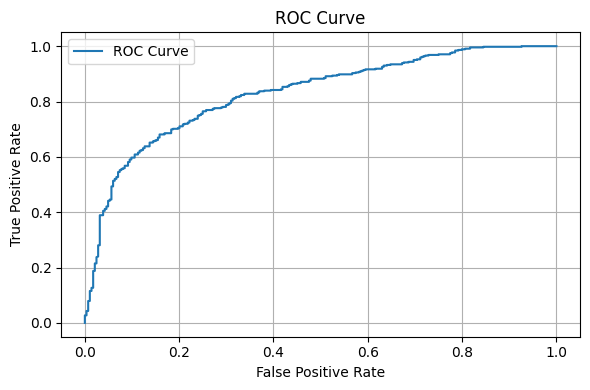

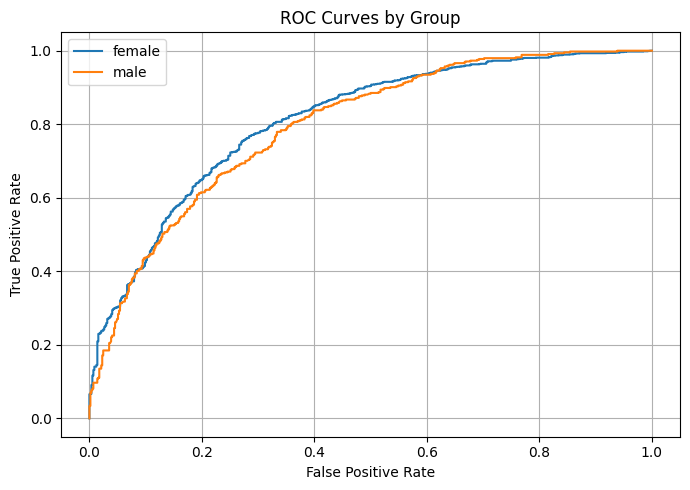

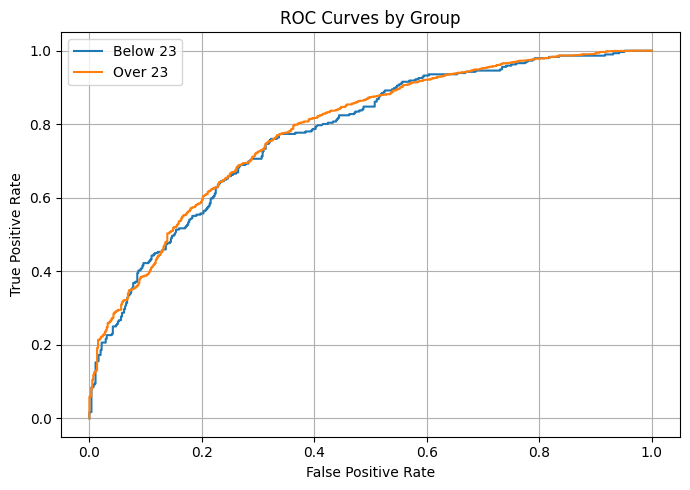

0.8583571894054584 0.6868754953676922
0.22915013259328718 0.5658878300323106


In [39]:
roc_curve_generator(y_test, y_prob)
# separate ROC for each group
log_y_prob_female = model.predict_proba(X_train_scaled[X_train_scaled["Gender"]==0])[:,1]
log_y_prob_male = model.predict_proba(X_train_scaled[X_train_scaled["Gender"]==1])[:,1]
log_thr_female, log_thr_male = roc_curve_generator_groups(y_train[X_train_scaled["Gender"]==0], log_y_prob_female, y_train[X_train_scaled["Gender"]==1], log_y_prob_male, "female", "male")

# separate ROC for each group
log_y_prob_old = model.predict_proba(X_train_scaled[X_train_scaled["Age at enrollment"]==1])[:,1]
log_y_prob_young = model.predict_proba(X_train_scaled[X_train_scaled["Age at enrollment"]==0])[:,1]
log_thr_old, log_thr_young = roc_curve_generator_groups(y_train[X_train_scaled["Age at enrollment"]==1], log_y_prob_old, y_train[X_train_scaled["Age at enrollment"]==0], log_y_prob_young, "Below 23", "Over 23")


print(log_thr_female, log_thr_male)
print(log_thr_old, log_thr_young)

In [40]:
print("Optimal Gender Thresholds:", f"Female: {log_thr_female:.3f}, Male: {log_thr_male:.3f}")
print("Optimal Age Thresholds:", f"Over 23: {log_thr_old:.3f}, Under 23: {log_thr_young:.3f}")


Optimal Gender Thresholds: Female: 0.858, Male: 0.687
Optimal Age Thresholds: Over 23: 0.229, Under 23: 0.566


In [44]:
def new_accuracy(y_prob, y_true, group_feature, thr_0, thr_1, group_names=("Group 0", "Group 1")):
    """
    Apply group-specific thresholds and calculate fairness metrics + accuracy.
    """
    # Apply different thresholds by group
    group_0_mask = group_feature == 0
    group_1_mask = group_feature == 1

    new_pred = np.where(
        group_0_mask,
        (y_prob >= thr_0).astype(int),
        (y_prob >= thr_1).astype(int)
    )

    # Create DataFrame for analysis
    df = pd.DataFrame({
        "group": group_feature,
        "y_true": y_true,
        "pred": new_pred
    })

    # Fairness metrics
    stat_parity_0 = df.loc[df["group"] == 0, "pred"].mean()
    stat_parity_1 = df.loc[df["group"] == 1, "pred"].mean()

    eq_odds_t0_0 = df.loc[(df["group"] == 0) & (df["y_true"] == 0), "pred"].mean()
    eq_odds_t0_1 = df.loc[(df["group"] == 1) & (df["y_true"] == 0), "pred"].mean()

    eq_odds_t1_0 = df.loc[(df["group"] == 0) & (df["y_true"] == 1), "pred"].mean()
    eq_odds_t1_1 = df.loc[(df["group"] == 1) & (df["y_true"] == 1), "pred"].mean()

    scores = [
        (stat_parity_0, stat_parity_1),
        (eq_odds_t0_0, eq_odds_t0_1),
        (eq_odds_t1_0, eq_odds_t1_1)
    ]
    metric_names = ["Statistical Parity", "FPR (Equalized Odds)", "TPR (Equalized Odds)"]

    # Build fairness DataFrame
    records = []
    for metric, (s0, s1) in zip(metric_names, scores):
        records.append({"Metric": metric, "Group": group_names[0], "Score": s0})
        records.append({"Metric": metric, "Group": group_names[1], "Score": s1})
    df_fair = pd.DataFrame(records)

    # Overall accuracy
    acc = accuracy_score(y_true, new_pred)
    f1 = f1_score(y_true, new_pred)

    return f1, acc, df_fair


Post-processed Accuracy (Gender): 0.6102
Post-processed Accuracy (Age): 0.7397
Post-processed F1 (Gender): 0.5557
Post-processed F1 (Age): 0.8050


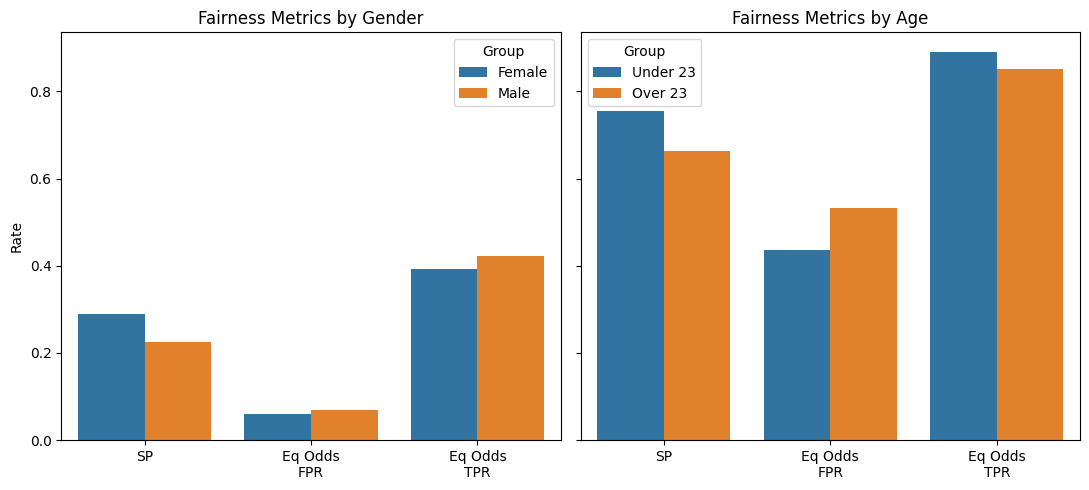

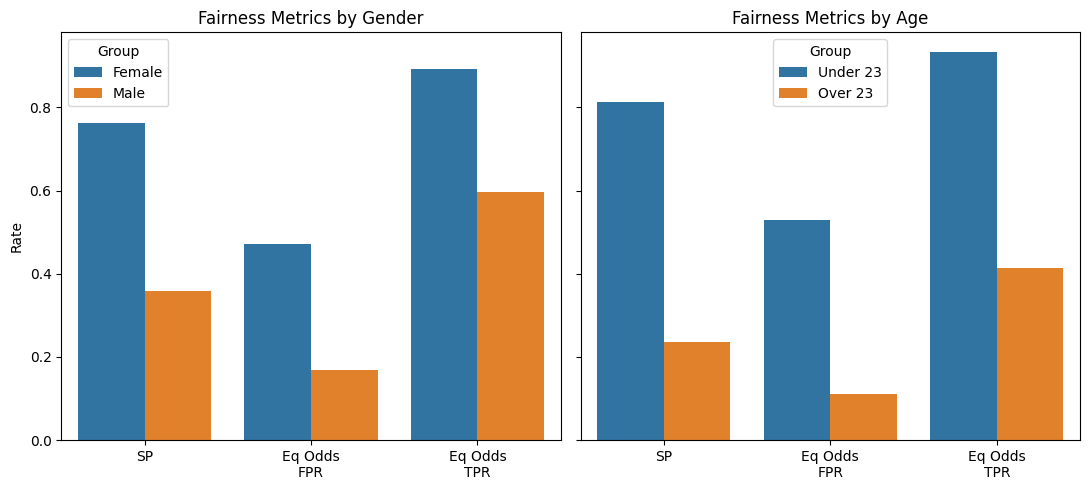

In [46]:
# Gender post-processed fairness
new_log_f1_gender, new_log_accuracy_gender, new_log_fairness_gender = new_accuracy(
    y_prob=y_prob,
    y_true=y_test,
    group_feature=X_test_scaled["Gender"],
    thr_0=log_thr_female,
    thr_1=log_thr_male,
    group_names=("Female", "Male")
)

# Age post-processed fairness
new_log_f1_age, new_log_accuracy_age, new_log_fairness_age = new_accuracy(
    y_prob=y_prob,
    y_true=y_test,
    group_feature=X_test_scaled["Age at enrollment"],
    thr_0=log_thr_young,
    thr_1=log_thr_old,
    group_names=("Under 23", "Over 23")
)

# Print
print(f"Post-processed Accuracy (Gender): {new_log_accuracy_gender:.4f}")
print(f"Post-processed Accuracy (Age): {new_log_accuracy_age:.4f}")
print(f"Post-processed F1 (Gender): {new_log_f1_gender:.4f}")
print(f"Post-processed F1 (Age): {new_log_f1_age:.4f}")


# Compare fairness visually
plot_fairness(new_log_fairness_gender, new_log_fairness_age)
plot_fairness(fair_gender, fair_age)


# logistic without protected features

In [48]:
X_train_np = X_train_scaled.drop(columns=["Gender", "Age at enrollment"], axis=1)
X_test_np = X_test_scaled.drop(columns=["Gender", "Age at enrollment"], axis=1)

In [50]:
logistic_model_np = LogisticRegression(max_iter=5000, penalty=None, C=0.8497534359086438, tol=1e-4, solver="saga")


logistic_model_np.fit(X_train_np, y_train)
log_y_pred_np = logistic_model_np.predict(X_test_np)
log_accuracy_np = accuracy_score(y_test, log_y_pred_np)
log_f1_score_np = f1_score(y_test, log_y_pred_np)
print(f"accuracy: {log_accuracy_np}")
print(f"F1 score: {log_f1_score_np}")

accuracy: 0.743801652892562
F1 score: 0.7947019867549668


/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [51]:
group_metrics_np = {m: {g: [] for g in ["Female", "Male", "Over_23", "Under_23"]} for m in ["F1", "Accuracy","PositiveRate", "BalancedAccuracy"]}
group_test_dict = {
        "Female": X_test_scaled["Gender"] == 0,
        "Male": X_test_scaled["Gender"] == 1,
        "Under_23": X_test_scaled["Age at enrollment"] == 0,
        "Over_23": X_test_scaled["Age at enrollment"] == 1
        
    }

In [52]:
 # Compute metrics per group
for group, mask in group_test_dict.items():
    if mask.sum() == 0:
        continue
    group_metrics_np["F1"][group].append(f1_score(y_test[mask], log_y_pred_np[mask]))
    group_metrics_np["PositiveRate"][group].append(np.mean(log_y_pred_np[mask]))
    group_metrics_np["Accuracy"][group].append(accuracy_score(y_test[mask], log_y_pred_np[mask]))
    group_metrics_np["BalancedAccuracy"][group].append(balanced_accuracy_score(y_test[mask], log_y_pred_np[mask]))

In [53]:
print(group_metrics_np)

{'F1': {'Female': [0.8309037900874635], 'Male': [0.6818181818181818], 'Over_23': [0.5536723163841808], 'Under_23': [0.8532235939643347]}, 'Accuracy': {'Female': [0.7637474541751528], 'Male': [0.7021276595744681], 'Over_23': [0.6550218340611353], 'Under_23': [0.7847082494969819]}, 'PositiveRate': {'Female': [0.7087576374745418], 'Male': [0.49361702127659574], 'Over_23': [0.3624454148471616], 'Under_23': [0.7665995975855131]}, 'BalancedAccuracy': {'Female': [0.7157152801949183], 'Male': [0.7040883734586025], 'Over_23': [0.6347123719464145], 'Under_23': [0.7119397516007098]}}


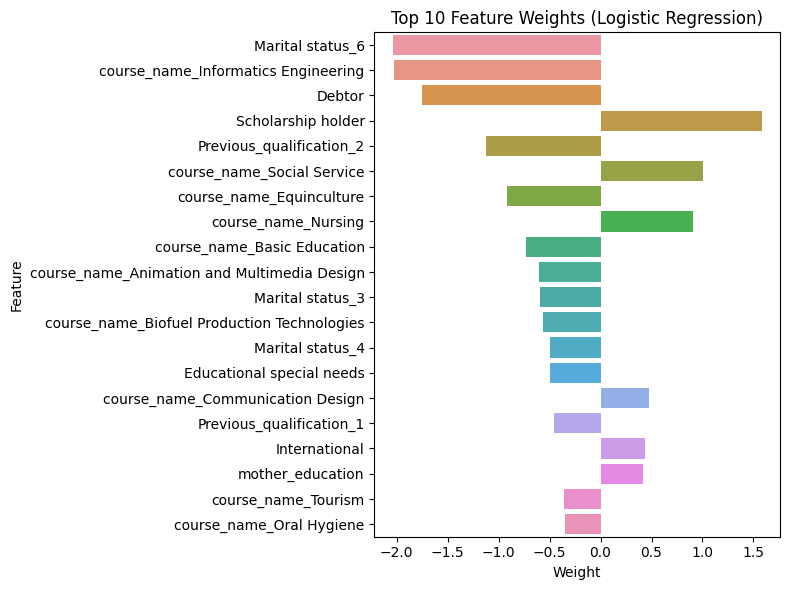

In [54]:
importance_df = pd.DataFrame({
    "Feature": X_train_np.columns,
    "Weight": logistic_model_np.coef_[0]
}).sort_values(by="Weight", key=np.abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df.head(20), x="Weight", y="Feature")
plt.title("Top 10 Feature Weights (Logistic Regression)")
plt.tight_layout()
plt.show()

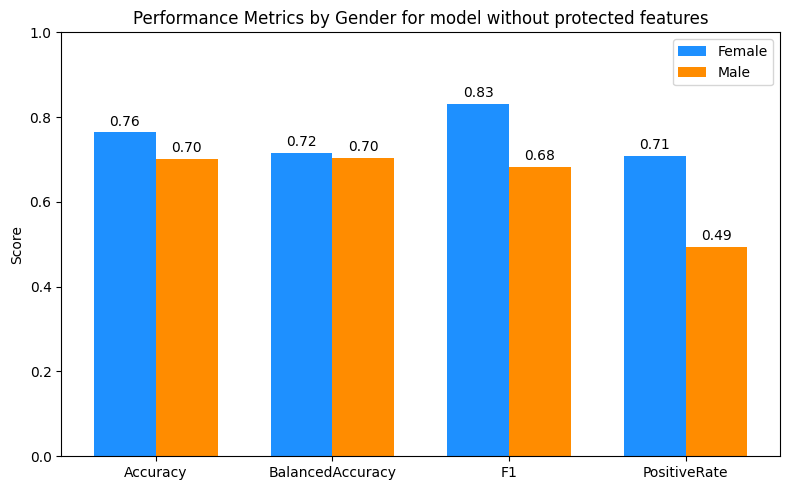

In [55]:
# Extract averages for Female and Male
metrics = ["Accuracy", "BalancedAccuracy", "F1", "PositiveRate"]
genders = ["Female", "Male"]

# Build data matrix: rows = metrics, cols = gender values
plot_data = []
for metric in metrics:
    row = [np.mean(group_metrics_np[metric][gender]) for gender in genders]
    plot_data.append(row)

# Convert to NumPy array for easy plotting
plot_data = np.array(plot_data)

# Plot
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, plot_data[:, 0], width, label='Female', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data[:, 1], width, label='Male', color='#FF8C00')

# Labels & formatting
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Gender for model without protected features')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=10)

plt.tight_layout()
plt.show()


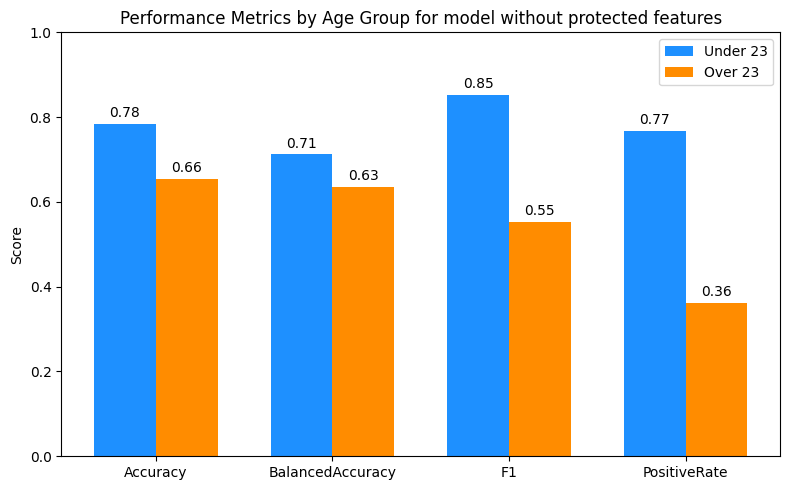

In [56]:
# Metrics and age groups
metrics = ["Accuracy", "BalancedAccuracy", "F1", "PositiveRate"]
age_groups = ["Under_23", "Over_23"]

# Build data matrix
plot_data_age = []
for metric in metrics:
    row = [np.mean(group_metrics_np[metric][age]) for age in age_groups]
    plot_data_age.append(row)

# Convert to NumPy array for plotting
plot_data_age = np.array(plot_data_age)

# Plot
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, plot_data_age[:, 0], width, label='Under 23', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data_age[:, 1], width, label="Over 23", color='#FF8C00')

# Labels & formatting
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Age Group for model without protected features')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [57]:
fair_age_np = compute_fairness_metrics(
    pred=log_y_pred_np,
    true=y_test,
    group_feature=X_test_scaled["Age at enrollment"],
    group_names=["Under 23", "Over 23"]
)
print(fair_age_np)

                 Metric     Group     Score
0    Statistical Parity  Under 23  0.766600
1    Statistical Parity   Over 23  0.362445
2  FPR (Equalized Odds)  Under 23  0.469799
3  FPR (Equalized Odds)   Over 23  0.251852
4  TPR (Equalized Odds)  Under 23  0.893678
5  TPR (Equalized Odds)   Over 23  0.521277


In [58]:
fair_gender_np = compute_fairness_metrics(
    pred=log_y_pred_np,
    true=y_test,
    group_feature=X_test_scaled["Gender"],
    group_names=["Female", "Male"]
)
print(fair_gender_np)

                 Metric   Group     Score
0    Statistical Parity  Female  0.708758
1    Statistical Parity    Male  0.493617
2  FPR (Equalized Odds)  Female  0.411765
3  FPR (Equalized Odds)    Male  0.312977
4  TPR (Equalized Odds)  Female  0.843195
5  TPR (Equalized Odds)    Male  0.721154


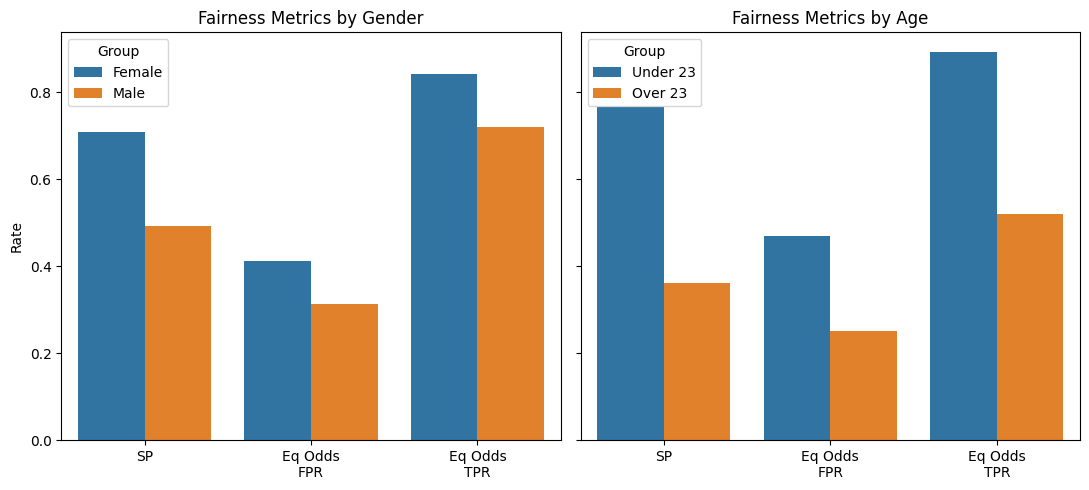

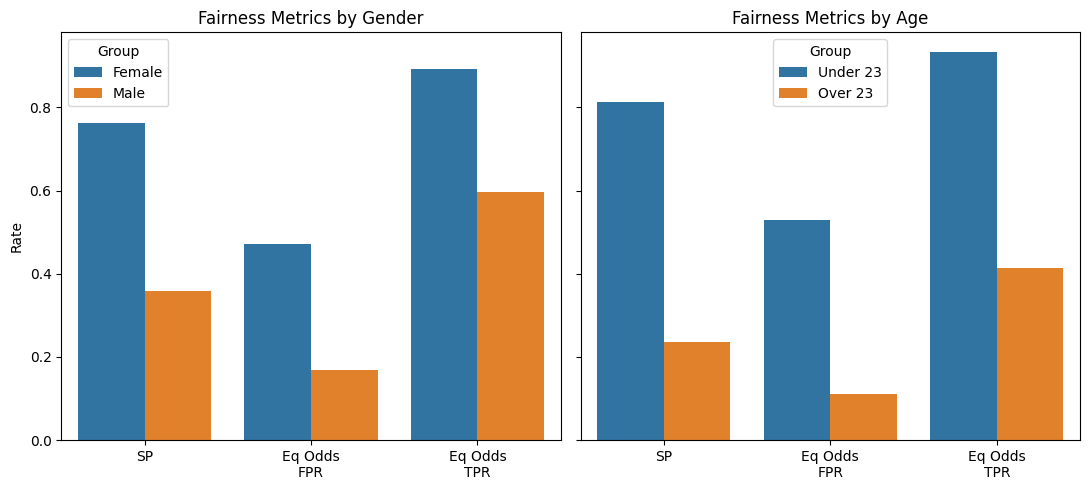

In [60]:
plot_fairness(fair_gender_np, fair_age_np)
plot_fairness(fair_gender, fair_age)


# fair PCA

In [62]:
X_train_scaled.columns

Index(['Admission grade', 'Application order', 'Daytime/evening attendance',
       'Displaced', 'Educational special needs', 'Debtor', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'International',
       'mother_education', 'father_education', 'Marital status_2',
       'Marital status_3', 'Marital status_4', 'Marital status_5',
       'Marital status_6', 'course_name_Agronomy',
       'course_name_Animation and Multimedia Design',
       'course_name_Basic Education',
       'course_name_Biofuel Production Technologies',
       'course_name_Communication Design', 'course_name_Equinculture',
       'course_name_Informatics Engineering',
       'course_name_Journalism and Communication', 'course_name_Management',
       'course_name_Nursing', 'course_name_Oral Hygiene',
       'course_name_Social Service', 'course_name_Tourism',
       'course_name_Veterinary Nursing', 'Previous_qualification_1',
       'Previous_qualification_2'],
      dtype='object')

In [63]:
class FairPCA:
    def __init__(self, Xs, p_idxs, n_components):
        Xs = Xs.values
        self.fit(Xs, p_idxs, n_components)

    def fit(self, Xs, p_idxs, n_components):
        # Extract protected features
        Xs_p = Xs[:, p_idxs]

        # Compute projection matrix (U)
        Z = Xs_p
        #Z = Z - Z.mean(0) # Since we alredy standardised everything, there is not much sense in removing the mean
        R = scipy.linalg.null_space(Z.T @ Xs)
        eig_vals, L = scipy.linalg.eig(R.T @ Xs.T @ Xs @ R)
        self.U = R @ L[:, :n_components]

    def project(self, Xs):
        return Xs @ self.U
    
fair_pca = FairPCA(X_train, [6,8], 30)
Xs_train_debiased = fair_pca.project(X_train)
Xs_test_debiased = fair_pca.project(X_test)

In [64]:
X_train_p = X_train_scaled[["Gender", "Age at enrollment"]]
X_test_p = X_test_scaled[["Gender", "Age at enrollment"]]

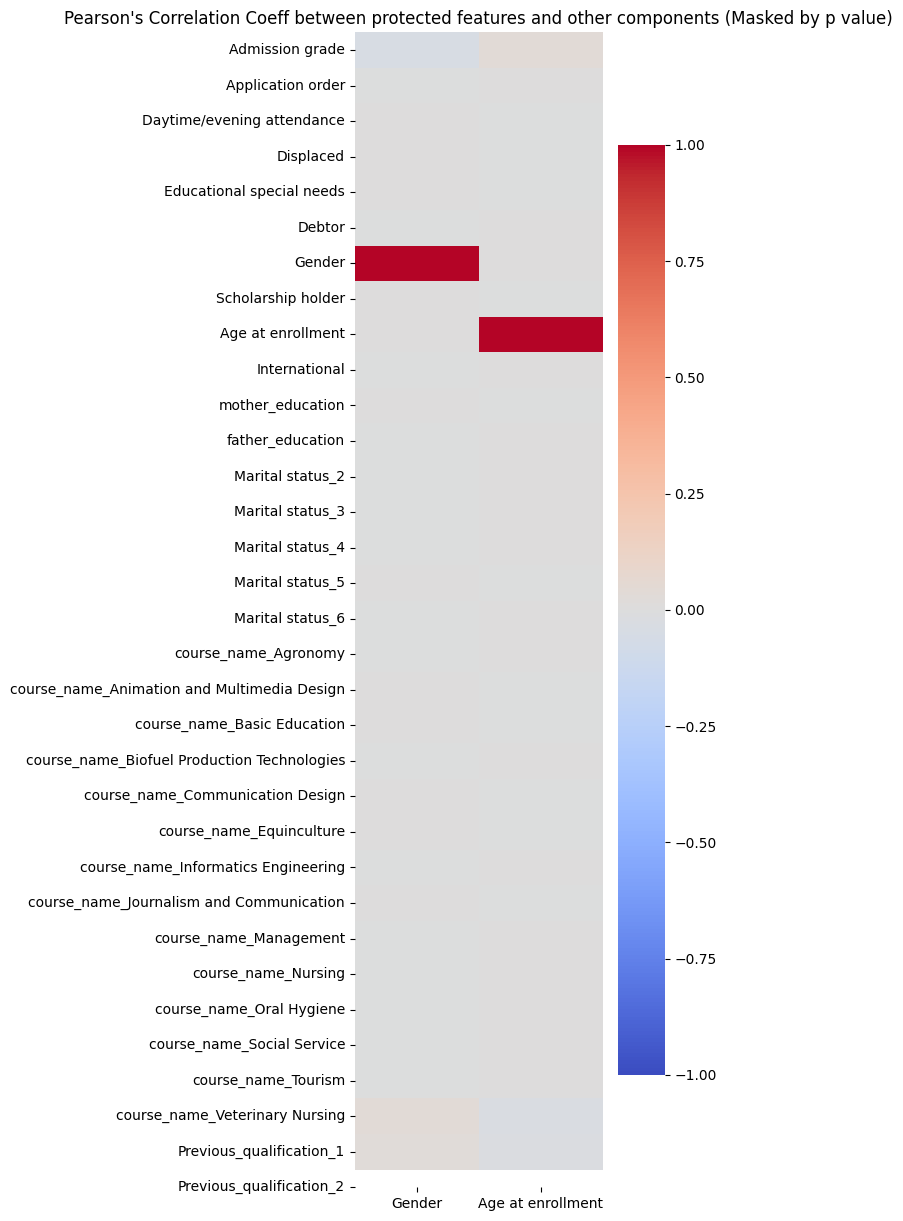

In [65]:
# Compute correlation matrix
Xs_train_debiased_p = np.concatenate([Xs_train_debiased, X_train_p], axis=1)
n_features = Xs_train_debiased_p.shape[1]
corr_ = np.zeros((n_features, n_features))
p_ = np.zeros((n_features, n_features))
for i in range(n_features):
    for j in range(n_features):
        corr_[i,j], p_[i,j] = pearsonr(Xs_train_debiased_p[:,i], Xs_train_debiased_p[:,j])
        corr_ = np.nan_to_num(corr_, 0)

# Plot correlations with protected features
plt.figure(figsize=(4,15))
sns.heatmap(corr_[:, [6, 8]], cmap="coolwarm", 
            xticklabels=["Gender", "Age at enrollment"], yticklabels=X_train_scaled.columns,
            vmin=-1, vmax=1)
plt.title("Pearson's Correlation Coeff between protected features and other components (Masked by p value)")
plt.show()

In [66]:
model_pca = LogisticRegression(penalty=None, max_iter=1000)

model_pca.fit(Xs_train_debiased, y_train)
pca_y_pred = model_pca.predict(Xs_test_debiased)


In [68]:
acc = accuracy_score(y_test, pca_y_pred)
f1 = f1_score(y_test, pca_y_pred)

print(acc, f1)

0.7493112947658402 0.8004385964912281


In [78]:
group_metrics_pca = {m: {g: [] for g in ["Female", "Male", "Over_23", "Under_23"]} for m in ["F1", "Accuracy","PositiveRate", "BalancedAccuracy"]}

# Define group masks
group_test_dict = {
    "Female": X_test_scaled["Gender"] == 0,
    "Male": X_test_scaled["Gender"] == 1,
    "Under_23": X_test_scaled["Age at enrollment"] == 0,
    "Over_23": X_test_scaled["Age at enrollment"] == 1
    
}

# Compute metrics per group
for group, mask in group_test_dict.items():
    if mask.sum() == 0:
        continue
    group_metrics_pca["F1"][group].append(f1_score(y_test[mask], pca_y_pred[mask]))
    group_metrics_pca["PositiveRate"][group].append(np.mean(pca_y_pred[mask]))
    group_metrics_pca["Accuracy"][group].append(accuracy_score(y_test[mask], pca_y_pred[mask]))
    group_metrics_pca["BalancedAccuracy"][group].append(balanced_accuracy_score(y_test[mask], pca_y_pred[mask]))

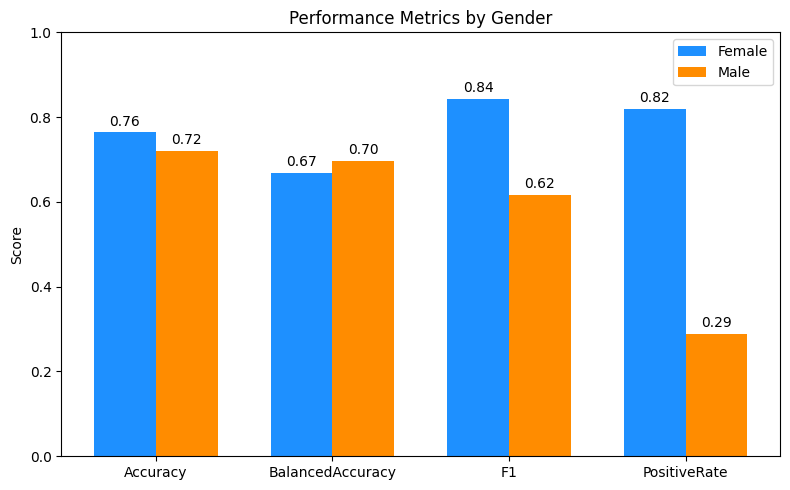

In [79]:
# Extract averages for Female and Male
metrics = ["Accuracy", "BalancedAccuracy", "F1", "PositiveRate"]
genders = ["Female", "Male"]

# Build data matrix: rows = metrics, cols = gender values
plot_data = []
for metric in metrics:
    row = [np.mean(group_metrics_pca[metric][gender]) for gender in genders]
    plot_data.append(row)

# Convert to NumPy array for easy plotting
plot_data = np.array(plot_data)

# Plot
x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, plot_data[:, 0], width, label='Female', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data[:, 1], width, label='Male', color='#FF8C00')

# Labels & formatting
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Gender')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=10)

plt.tight_layout()
plt.show()


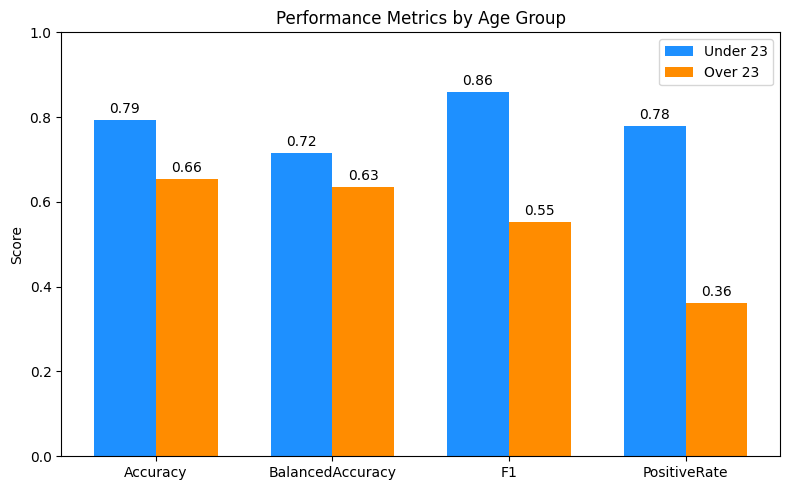

In [80]:
# Metrics and age groups
metrics = ["Accuracy", "BalancedAccuracy", "F1", "PositiveRate"]
age_groups = ["Under_23", "Over_23"]

# Build data matrix
plot_data_age = []
for metric in metrics:
    row = [np.mean(group_metrics_pca[metric][age]) for age in age_groups]
    plot_data_age.append(row)

# Convert to NumPy array for plotting
plot_data_age = np.array(plot_data_age)

# Plot
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, plot_data_age[:, 0], width, label='Under 23', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data_age[:, 1], width, label="Over 23", color='#FF8C00')

# Labels & formatting
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
fair_age_pca = compute_fairness_metrics(
    pred=pca_y_pred,
    true=y_test,
    group_feature=X_test_scaled["Age at enrollment"],
    group_names=["Under 23", "Over 23"]
)
print(fair_age_pca)

                 Metric     Group     Score
0    Statistical Parity  Under 23  0.778672
1    Statistical Parity   Over 23  0.362445
2  FPR (Equalized Odds)  Under 23  0.476510
3  FPR (Equalized Odds)   Over 23  0.251852
4  TPR (Equalized Odds)  Under 23  0.908046
5  TPR (Equalized Odds)   Over 23  0.521277


In [76]:
fair_gender_pca = compute_fairness_metrics(
    pred=pca_y_pred,
    true=y_test,
    group_feature=X_test_scaled["Gender"],
    group_names=["Female", "Male"]
)
print(fair_gender_pca)


                 Metric   Group     Score
0    Statistical Parity  Female  0.818737
1    Statistical Parity    Male  0.289362
2  FPR (Equalized Odds)  Female  0.588235
3  FPR (Equalized Odds)    Male  0.114504
4  TPR (Equalized Odds)  Female  0.923077
5  TPR (Equalized Odds)    Male  0.509615


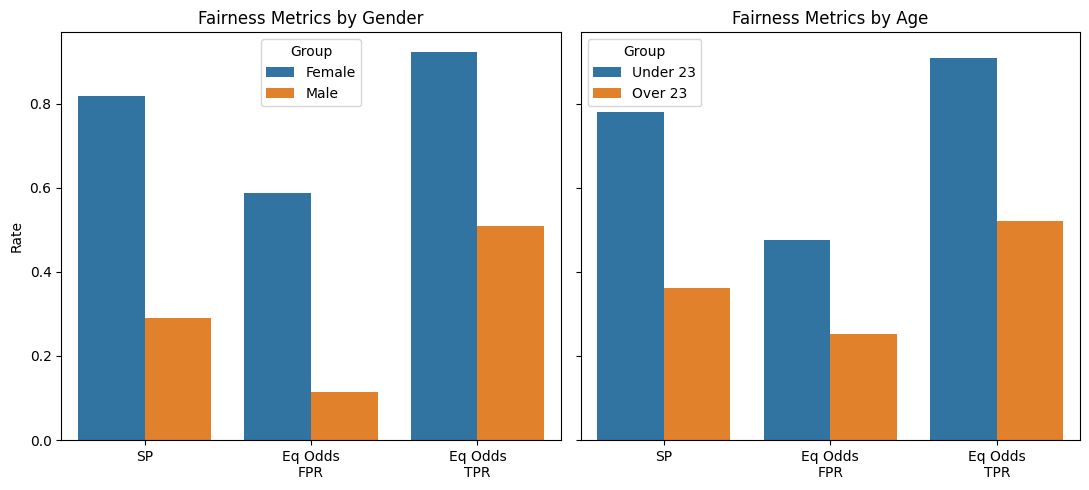

In [77]:
plot_fairness(fair_gender_pca, fair_age_pca)

## final metrics


In [53]:
print("Mean Accuracy (CV):", round(np.mean(overall_accuracies), 4))
print("Mean F1 Score (CV):", round(np.mean(overall_f1s), 4))
print("Accuracy w/o Protected Features:", round(log_accuracy_np, 4))
print("Fairness after group thresholds:\n")
print(new_log_fairness_gender)
print(new_log_fairness_age)


Mean Accuracy (CV): 0.7584
Mean F1 Score (CV): 0.8097
Accuracy w/o Protected Features: 0.7438
Fairness after group thresholds:

                 Metric   Group     Score
0    Statistical Parity  Female  0.289206
1    Statistical Parity    Male  0.225532
2  FPR (Equalized Odds)  Female  0.058824
3  FPR (Equalized Odds)    Male  0.068702
4  TPR (Equalized Odds)  Female  0.393491
5  TPR (Equalized Odds)    Male  0.423077
                 Metric     Group     Score
0    Statistical Parity  Under 23  0.754527
1    Statistical Parity   Over 23  0.663755
2  FPR (Equalized Odds)  Under 23  0.436242
3  FPR (Equalized Odds)   Over 23  0.533333
4  TPR (Equalized Odds)  Under 23  0.890805
5  TPR (Equalized Odds)   Over 23  0.851064


In [56]:
print(fair_gender)
print(fair_age)

                 Metric   Group     Score
0    Statistical Parity  Female  0.658363
1    Statistical Parity    Male  0.295031
2  FPR (Equalized Odds)  Female  0.461538
3  FPR (Equalized Odds)    Male  0.177033
4  TPR (Equalized Odds)  Female  0.798780
5  TPR (Equalized Odds)    Male  0.513274
                 Metric     Group     Score
0    Statistical Parity  Under 23  0.663430
1    Statistical Parity   Over 23  0.206767
2  FPR (Equalized Odds)  Under 23  0.464419
3  FPR (Equalized Odds)   Over 23  0.119318
4  TPR (Equalized Odds)  Under 23  0.814815
5  TPR (Equalized Odds)   Over 23  0.377778


# In processing

In [84]:
def sigmoid(x):
    """
    Compute the sigmoid function 
    f = 1/(1+exp(-beta^T * x))
    This function assumes as input that you have already multiplied beta and X together
    """
    return 1./(1 + np.exp(-x.astype(float)))

def logistic_loss(y_true, y_pred, eps = 1e-9):
    """
    Loss for the logistic regression, y_pred are probabilities
    """
    return -np.mean(y_true * np.log(y_pred + eps) + (1-y_true) * np.log(1-y_pred + eps))

def l2_loss(beta):
    """
    L2-Regularisation
    """
    return np.linalg.norm(beta,2)

def fair_loss_group(y, probs, groups, group_type):
    """
    Individual fairness Loss for gender
    """
    if group_type == "Gender":
        n = y.shape[0]
        n1 = np.sum(groups == 0)
        n2 = np.sum(groups == 1)
    elif group_type == "Age":
        n = y.shape[0]
        n1 = np.sum(groups == 0)
        n2 = np.sum(groups == 1)
    
    #print(n, n1, n2)
    
    ## Solution with numpy
    equal_pairs = np.argwhere(y[np.newaxis, :] == y[:, np.newaxis]) ### Check if labels are the same, distance is 1 if y[i] == y[j] and 0 if y[i] != y[j]
    equal_pairs = equal_pairs[np.where(equal_pairs[:,0] != equal_pairs[:,1])] ### Remove the pairs where items are compared to themselves
    
    
    #diff_groups = (groups[equal_pairs[:,0]] != groups[equal_pairs[:,1]]).astype(int) ### Find pairs where groups are different
    diff_groups = (groups.iloc[equal_pairs[:,0]].to_numpy() != groups.iloc[equal_pairs[:,1]].to_numpy()).astype(int)

    diff_probs = probs.iloc[equal_pairs[:,0]].to_numpy() - probs.iloc[equal_pairs[:,1]].to_numpy()
   
    
    cost = diff_groups.dot(diff_probs)  # Ensures correct dot product shape
    cost /= (n1*n2)
    print(cost)
    print(cost**2)
    return cost**2

def compute_cost(beta, X, y, groups, group_type, _lambda, _gamma):
    # Compute predicted probs
    probs = sigmoid(X.dot(beta).astype(float))
    # Compute joint loss
    loss = logistic_loss(y, probs) + _lambda * fair_loss_group(y, probs, groups, group_type) + _gamma * l2_loss(beta[1:])

    return loss

def compute_gradients(beta, X, y, groups, group_type, _lambda, _gamma):
    """
    Calculate the gradient - used for finding the best beta values
    """
    # Start with empty gradient
    grad = np.zeros(beta.shape)
    
    m = len(X) # Number of training samples
    
    # Calculate the probs
    probs = sigmoid(X.dot(beta).astype(float))
    
    # Calculate gradients for each beta value
    for j in range(len(grad)):
        if j == 0: ### We do not want to regularize the intercept
            grad[j] = (1/m) * (probs-y).dot(X.iloc[:,j])
        else:
            grad[j] = (1/m) * (probs-y).dot(X.iloc[:,j]) + (2*_gamma)*beta[j]
        
    return grad

In [85]:
compute_cost(
    beta = np.random.rand(X_train_scaled.shape[1]),
    X = X_train_scaled, 
    y = y_train,
    groups = X_train_scaled["Gender"], 
    group_type = "Gender",
    _gamma = 1, 
    _lambda = 0.1
)

/var/folders/88/sc4x6tp51js4ksjtccntc4wc0000gq/T/ipykernel_4919/1894508752.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  equal_pairs = np.argwhere(y[np.newaxis, :] == y[:, np.newaxis]) ### Check if labels are the same, distance is 1 if y[i] == y[j] and 0 if y[i] != y[j]


1.566081481403558e-17
2.452611206395163e-34


4.126324598772212

In [88]:
# Set seed and define params
beta = np.random.rand(X_train_scaled.shape[1])
lambda_ = 0.1
gamma_ = 1e-5 

# Run optimization
result_gender, _, _ = opt.fmin_tnc(
    func=compute_cost,
    x0=beta,
    fprime=compute_gradients,
    approx_grad=False,
    maxfun = 500,
    args = (
        X_train_scaled, 
        y_train,
        X_train_scaled["Gender"],
        "Gender",
        lambda_, 
        gamma_
    ),
    xtol=1e-7,
    ftol=1e-5
)

/var/folders/88/sc4x6tp51js4ksjtccntc4wc0000gq/T/ipykernel_4919/1894508752.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  equal_pairs = np.argwhere(y[np.newaxis, :] == y[:, np.newaxis]) ### Check if labels are the same, distance is 1 if y[i] == y[j] and 0 if y[i] != y[j]


-8.304977552897657e-19
6.897265215413396e-37


  NIT   NF   F                       GTG
    0    1  1.039445970341089E+00   1.84274102E-01


1.1864253646996654e-19
1.407605146002734e-38
-8.304977552897657e-19
6.897265215413396e-37
1.0321900672887088e-17
1.0654163350094692e-34
1.779638047049498e-18
3.167111578506151e-36
2.088108641871411e-17
4.360197700258068e-34
4.840615487974634e-17
2.3431558302419906e-33


    1    7  5.452286120872100E-01   5.18572148E-03


5.220271604678527e-17
2.7251235626612926e-33
-4.840615487974634e-17
2.3431558302419906e-33
-1.1389683501116787e-17
1.2972489025561193e-34
7.593122334077859e-18
5.765550678027199e-35
-1.1389683501116787e-17
1.2972489025561193e-34
3.6067331086869826e-17
1.3008523717298865e-33
1.1389683501116787e-17
1.2972489025561193e-34
2.847420875279197e-17
8.107805640975747e-34


    2   15  5.058197385988723E-01   4.63609855E-04
tnc: fscale = 39.4713


-5.694841750558393e-18
3.2431222563902983e-35
-2.847420875279197e-17
8.107805640975747e-34
-7.593122334077859e-18
5.765550678027199e-35


    3   18  5.035240974268042E-01   1.51615260E-04


-3.0372489336311435e-17
9.224881084843518e-34
1.1010027384412895e-16
1.2122070300552184e-32
0.0
0.0
2.847420875279197e-17
8.107805640975747e-34


    4   22  4.988622273246279E-01   6.94179481E-06


-1.0250715151005109e-16
1.0507716110704568e-32
-1.8982805835194647e-18
3.603469173766999e-36
-4.176217283742822e-17
1.7440790801032272e-33
2.6575928169272503e-17
7.062799580583317e-34
5.694841750558393e-18
3.2431222563902983e-35
3.9863892253908755e-17
1.5891299056312465e-33
-1.3287964084636251e-17
1.7656998951458293e-34
-6.454153983966179e-17
4.165610364874651e-33
2.2779367002233573e-17
5.188995610224477e-34


    5   31  4.981501928874289E-01   2.62922331E-07
tnc: fscale = 1263.01


-7.593122334077859e-18
5.765550678027199e-35
7.023638159022018e-17
4.933149298887021e-33
-5.694841750558393e-18
3.2431222563902983e-35
1.5186244668155718e-17
2.3062202712108795e-34
-1.708452525167518e-17
2.9188100307512684e-34
1.8982805835194647e-18
3.603469173766999e-36
4.7457014587986614e-17
2.2521682336043743e-33
3.796561167038929e-18
1.4413876695067997e-35


    6   39  4.981366886530700E-01   1.22123335E-08


-7.403294275725912e-17
5.480876613299606e-33
5.505013692206447e-17
3.030517575138046e-33
-1.8982805835194647e-18
3.603469173766999e-36
-1.5186244668155718e-17
2.3062202712108795e-34


tnc: |fn-fn-1] = 7.72993e-06 -> convergence
    7   43  4.981289587249831E-01   6.33833497E-08
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [90]:
y_pred_fair_gender = np.array([True if x >=0.5 else False for x in sigmoid(result_gender @ X_test_scaled.T)])

In [ ]:
fair_men = accuracy_score(y_test[X_test_scaled["Gender"]==1], y_pred_fair_gender[X_test_scaled["Gender"]==1])
fair_women = accuracy_score(y_test[X_test_scaled["Gender"]==0], y_pred_fair_gender[X_test_scaled["Gender"]==0])

basic_men = accuracy_score(y_test[X_test_scaled["Gender"]==1], y_pred[X_test_scaled["Gender"]==1])
basic_women = accuracy_score(y_test[X_test_scaled["Gender"]==0], y_pred[X_test_scaled["Gender"]==0])

balanced_fair_men = balanced_accuracy_score(y_test[X_test_scaled["Gender"]==1], y_pred_fair_gender[X_test_scaled["Gender"]==1])
balanced_fair_women = balanced_accuracy_score(y_test[X_test_scaled["Gender"]==0], y_pred_fair_gender[X_test_scaled["Gender"]==0])

balanced_basic_men = balanced_accuracy_score(y_test[X_test_scaled["Gender"]==1], y_pred[X_test_scaled["Gender"]==1])
balanced_basic_women = balanced_accuracy_score(y_test[X_test_scaled["Gender"]==0], y_pred[X_test_scaled["Gender"]==0])

f1_score_fair_men =  f1_score(y_test[X_test_scaled["Gender"]==1], y_pred_fair_gender[X_test_scaled["Gender"]==1])
f1_score_fair_women  = f1_score(y_test[X_test_scaled["Gender"]==0], y_pred_fair_gender[X_test_scaled["Gender"]==0])

f1_score_basic_men =  f1_score(y_test[X_test_scaled["Gender"]==1], y_pred[X_test_scaled["Gender"]==1])
f1_score_basic_women  = f1_score(y_test[X_test_scaled["Gender"]==0], y_pred[X_test_scaled["Gender"]==0])

tpr_fair_men = recall_score(y_test[X_test_scaled["Gender"] == 1], y_pred_fair_gender[X_test_scaled["Gender"] == 1])
tpr_fair_women = recall_score(y_test[X_test_scaled["Gender"] == 0], y_pred_fair_gender[X_test_scaled["Gender"] == 0])

# Positive prediction rate for the fair model
tpr_basic_men = recall_score(y_test[X_test_scaled["Gender"] == 1], y_pred[X_test_scaled["Gender"] == 1])
tpr_basic_women = recall_score(y_test[X_test_scaled["Gender"] == 0], y_pred[X_test_scaled["Gender"] == 0])

In [ ]:
print(fair_men, fair_women)
print(basic_men, basic_women)
print(balanced_fair_men, balanced_fair_women)
print(balanced_basic_men, balanced_basic_women)
print(f1_score_fair_men, f1_score_fair_women)
print(f1_score_basic_men, f1_score_basic_women)
print(tpr_fair_men, tpr_fair_women)
print(tpr_basic_men, tpr_basic_women)


0.7191489361702128 0.7637474541751528
0.7276595744680852 0.780040733197556
0.7044920728126836 0.6942510732103493
0.7141074574280681 0.7114514444831187
0.6451612903225806 0.8366197183098592
0.6595744680851063 0.848314606741573
0.34893617021276596 0.7576374745417516
0.3574468085106383 0.7617107942973523


In [96]:
# Age 
compute_cost(
    beta = np.random.rand(X_train_scaled.shape[1]),
    X = X_train_scaled, 
    y = y_train,
    groups = X_train_scaled["Age at enrollment"], 
    group_type = "Age",
    _gamma = 1, 
    _lambda = 0.1
)

/var/folders/88/sc4x6tp51js4ksjtccntc4wc0000gq/T/ipykernel_4919/1894508752.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  equal_pairs = np.argwhere(y[np.newaxis, :] == y[:, np.newaxis]) ### Check if labels are the same, distance is 1 if y[i] == y[j] and 0 if y[i] != y[j]


6.52065501578537e-19
4.2518941834886904e-37


4.1479258356068405

In [97]:
# Set seed and define params
beta = np.random.rand(X_train_scaled.shape[1])
lambda_ = 0.1
gamma_ = 1e-5 

# Run optimization
result_age, _, _ = opt.fmin_tnc(
    func=compute_cost,
    x0=beta,
    fprime=compute_gradients,
    approx_grad=False,
    maxfun = 500,
    args = (
        X_train_scaled, 
        y_train,
        X_train_scaled["Age at enrollment"],
        "Age",
        lambda_, 
        gamma_
    ),
    xtol=1e-7,
    ftol=1e-5
)

/var/folders/88/sc4x6tp51js4ksjtccntc4wc0000gq/T/ipykernel_4919/1894508752.py:37: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  equal_pairs = np.argwhere(y[np.newaxis, :] == y[:, np.newaxis]) ### Check if labels are the same, distance is 1 if y[i] == y[j] and 0 if y[i] != y[j]


-1.7018909591199817e-17
2.896432836734331e-34


  NIT   NF   F                       GTG
    0    1  8.910945204602465E-01   1.09359079E-01


-2.9473360671349874e-17
8.686789892634734e-34
5.216524012628296e-18
2.721212277432762e-35
6.1946222649961014e-18
3.837334500598543e-35
-3.6254841887766655e-17
1.3144135603069596e-33
2.347435805682733e-17
5.510454861801342e-34


    1    6  5.492321781365109E-01   3.02994152E-03


3.155997027640119e-17
9.960317238473266e-34
-2.4517662859352992e-17
6.011157920848971e-34
6.364159295406521e-17
4.050252353730923e-33
3.4429058483346756e-17
1.1853600680497113e-33
-6.259828815153955e-18
3.9185456795031766e-35


    2   11  5.100894938027398E-01   8.50171192E-04
tnc: fscale = 26.2142


1.5649572037884887e-18
2.4490910496894854e-36
5.3208544928808616e-17
2.8311492534410452e-33
2.1909400853038843e-17
4.800218457391392e-34
1.0433048025256592e-17
1.0884849109731047e-34
-8.868090821468103e-18
7.864303481780681e-35
-2.0866096050513185e-17
4.353939643892419e-34


    3   17  4.992854745858523E-01   1.26799342E-05


-3.651566808839807e-18
1.3333940159420534e-35
-6.259828815153955e-18
3.9185456795031766e-35
-4.6948716113654665e-18
2.2041819447205372e-35
9.650569423362348e-17
9.313349019513628e-33
-2.164857465240743e-17
4.686607844808575e-34


    4   22  4.985130797329344E-01   1.43592147E-06
tnc: fscale = 569.418


6.52065501578537e-18
4.2518941834886907e-35
2.5300141461247236e-17
6.400971579591215e-34
3.3907406082083923e-18
1.1497121872153418e-35
-5.9990026145225404e-18
3.5988032369048274e-35
-5.659928553701702e-17
3.203479123300783e-33
-7.303133617679614e-18
5.333576063768213e-35
3.4689884683978166e-17
1.203388099387703e-33
-5.503432833322852e-17
3.0287772950895995e-33
-1.2780483830939325e-17
1.6334076695290151e-34
-2.921253447071846e-17
8.533721702029142e-34
-1.460626723535923e-17
2.1334304255072854e-34


    5   33  4.982118228085203E-01   1.54289824E-06


-4.9035325718705984e-17
2.4044631683395885e-33
-3.860227769344939e-17
1.4901358431221801e-33
-2.1387748451776012e-17
4.5743578383644725e-34
1.9822791247987524e-17
3.929430528612908e-34


    6   37  4.981526131447774E-01   2.20371492E-07


-3.4429058483346756e-17
1.1853600680497113e-33
1.0433048025256592e-18
1.0884849109731048e-36
1.8257834044199036e-17
3.3334850398551333e-34
-3.1299144075769774e-18
9.796364198757941e-36


    7   41  4.981298636734401E-01   7.40989506E-08


7.824786018942443e-18
6.122727624223713e-35
-6.259828815153955e-18
3.9185456795031766e-35
-1.5649572037884886e-17
2.4490910496894853e-34
6.155498334901389e-17
3.7890159750973776e-33
-4.7992020916180323e-17
2.3032340716190896e-33


tnc: |fn-fn-1] = 8.7376e-07 -> convergence
    8   46  4.981289899131234E-01   3.96629031E-09
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [98]:
y_pred_fair_age = np.array([True if x >=0.5 else False for x in sigmoid(result_age @ X_test_scaled.T)])

In [119]:
fair_over = accuracy_score(y_test[X_test_scaled["Age at enrollment"]==1], y_pred_fair_age[X_test_scaled["Age at enrollment"]==1])
fair_under = accuracy_score(y_test[X_test_scaled["Age at enrollment"]==0], y_pred_fair_age[X_test_scaled["Age at enrollment"]==0])

basic_over = accuracy_score(y_test[X_test_scaled["Age at enrollment"]==1], y_pred[X_test_scaled["Age at enrollment"]==1])
basic_under = accuracy_score(y_test[X_test_scaled["Age at enrollment"]==0], y_pred[X_test_scaled["Age at enrollment"]==0])

balanced_fair_over = balanced_accuracy_score(y_test[X_test_scaled["Age at enrollment"]==1], y_pred_fair_age[X_test_scaled["Age at enrollment"]==1])
balanced_fair_under = balanced_accuracy_score(y_test[X_test_scaled["Age at enrollment"]==0], y_pred_fair_age[X_test_scaled["Age at enrollment"]==0])

balanced_basic_over = balanced_accuracy_score(y_test[X_test_scaled["Age at enrollment"]==1], y_pred[X_test_scaled["Age at enrollment"]==1])
balanced_basic_under = balanced_accuracy_score(y_test[X_test_scaled["Age at enrollment"]==0], y_pred[X_test_scaled["Age at enrollment"]==0])

f1_score_fair_over =  f1_score(y_test[X_test_scaled["Age at enrollment"]==1], y_pred_fair_age[X_test_scaled["Age at enrollment"]==1])
f1_score_fair_under  = f1_score(y_test[X_test_scaled["Age at enrollment"]==0], y_pred_fair_age[X_test_scaled["Age at enrollment"]==0])

f1_score_basic_over =  f1_score(y_test[X_test_scaled["Age at enrollment"]==1], y_pred[X_test_scaled["Age at enrollment"]==1])
f1_score_basic_under  = f1_score(y_test[X_test_scaled["Age at enrollment"]==0], y_pred[X_test_scaled["Age at enrollment"]==0])


In [120]:
print(fair_over, fair_under)
print(basic_over, basic_under)
print(balanced_fair_over, balanced_fair_under)
print(balanced_basic_over, balanced_basic_under)
print(f1_score_fair_over, f1_score_fair_under)
print(f1_score_basic_over, f1_score_basic_under)


0.6724890829694323 0.7847082494969819
0.6943231441048034 0.7947686116700201
0.6349881796690308 0.7004262130679627
0.6518912529550827 0.7018533518475661
0.5161290322580645 0.8556005398110661
0.527027027027027 0.8643617021276596


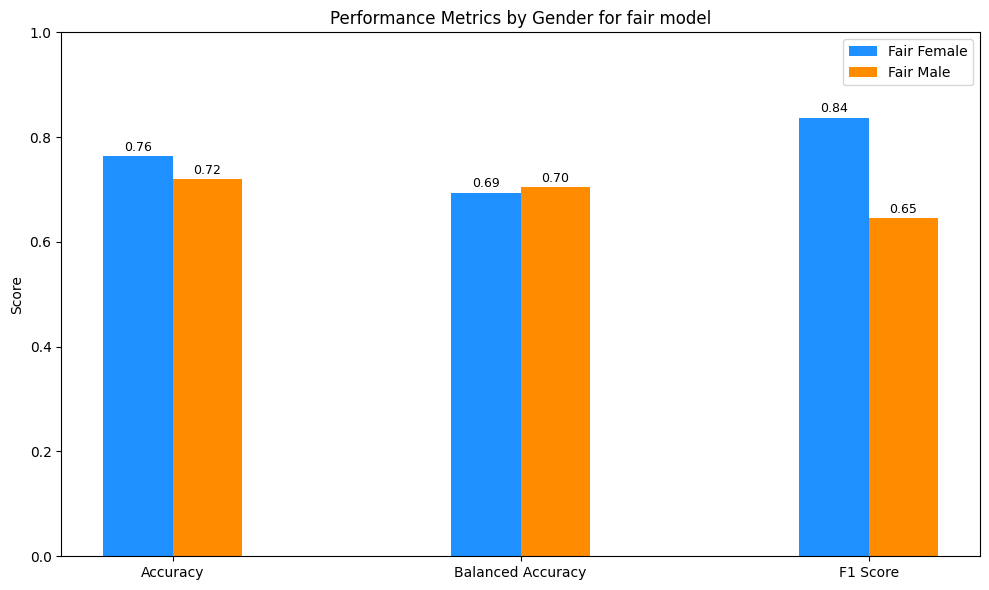

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics per model and gender
metrics = ["Accuracy", "BalancedAccuracy", "F1"]
metric_labels = ["Accuracy", "Balanced Accuracy", "F1 Score"]

# Collect metric values: [Fair Female, Fair Male, Basic Female, Basic Male]
plot_data = [
    [fair_women, fair_men],                           # Accuracy
    [balanced_fair_women, balanced_fair_men],  # Balanced Accuracy
    [f1_score_fair_women, f1_score_fair_men]
]

plot_data = np.array(plot_data)

x = np.arange(len(metrics))  # the label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, plot_data[:, 0], width, label='Fair Female', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data[:, 1], width, label='Fair Male', color='#FF8C00')


# Add labels, title, legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Gender for fair model')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', fontsize=9)

plt.tight_layout()
plt.show()


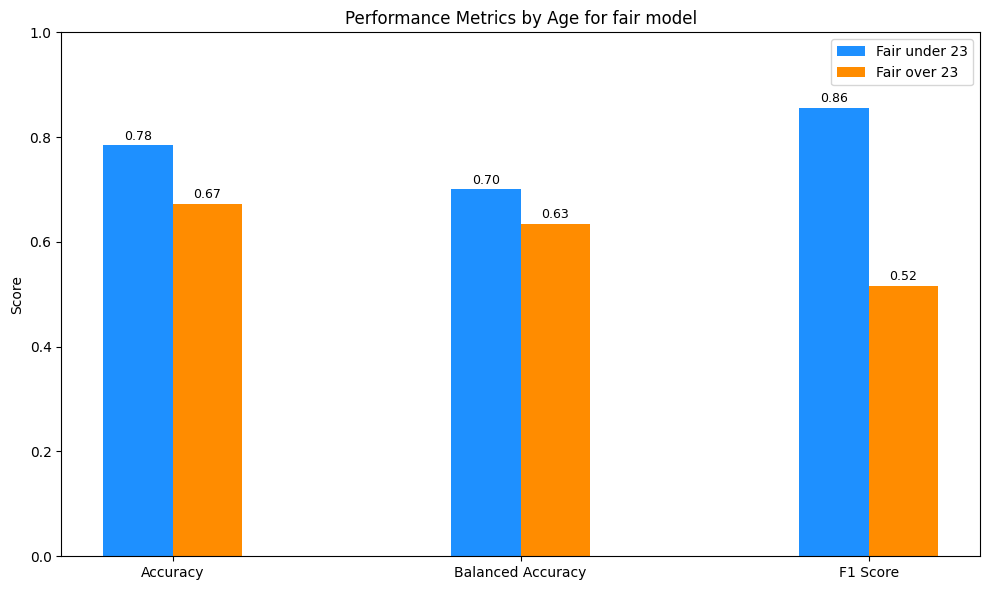

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics per model and gender
metrics = ["Accuracy", "BalancedAccuracy", "F1"]
metric_labels = ["Accuracy", "Balanced Accuracy", "F1 Score"]

# Collect metric values: [Fair Female, Fair Male, Basic Female, Basic Male]
plot_data = [
    [fair_under, fair_over],                           # Accuracy
    [balanced_fair_under, balanced_fair_over],  # Balanced Accuracy
    [f1_score_fair_under, f1_score_fair_over]   # F1
   
]

plot_data = np.array(plot_data)

x = np.arange(len(metrics))  # the label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, plot_data[:, 0], width, label='Fair under 23', color='#1E90FF')
bars2 = ax.bar(x + width/2, plot_data[:, 1], width, label='Fair over 23', color='#FF8C00')


# Add labels, title, legend
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Age for fair model')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [125]:
fair_age_in_processing = compute_fairness_metrics(
    pred=y_pred_fair_age,
    true=y_test,
    group_feature=X_test_scaled["Age at enrollment"],
    group_names=["Under 23", "Over 23"]
)
print(fair_age_in_processing)

                 Metric     Group     Score
0    Statistical Parity  Under 23  0.790744
1    Statistical Parity   Over 23  0.266376
2  FPR (Equalized Odds)  Under 23  0.510067
3  FPR (Equalized Odds)   Over 23  0.155556
4  TPR (Equalized Odds)  Under 23  0.910920
5  TPR (Equalized Odds)   Over 23  0.425532


In [126]:
fair_gender_in_processing = compute_fairness_metrics(
    pred=y_pred_fair_gender,
    true=y_test,
    group_feature=X_test_scaled["Gender"],
    group_names=["Female", "Male"]
)
print(fair_gender_in_processing)

                 Metric   Group     Score
0    Statistical Parity  Female  0.757637
1    Statistical Parity    Male  0.348936
2  FPR (Equalized Odds)  Female  0.490196
3  FPR (Equalized Odds)    Male  0.167939
4  TPR (Equalized Odds)  Female  0.878698
5  TPR (Equalized Odds)    Male  0.576923


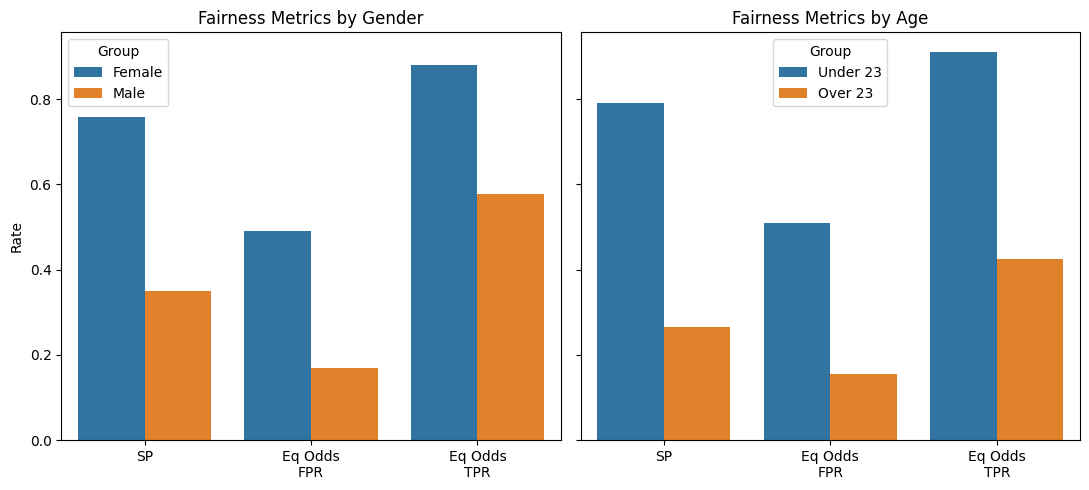

In [127]:
plot_fairness(fair_gender_in_processing, fair_age_in_processing)